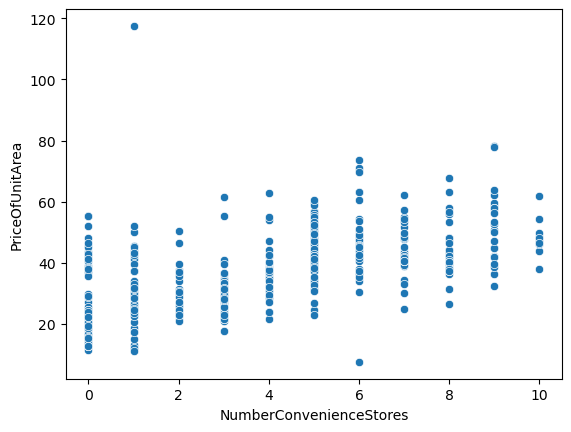

In [1]:
# Import seaborn with alias sns
import seaborn as sns
import pandas as pd

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

taiwan_real_estate = pd.read_csv("realestate.csv")

# Draw the scatter plot
sns.scatterplot(data=taiwan_real_estate, x="NumberConvenienceStores", y="PriceOfUnitArea")

# Show the plot
plt.show()

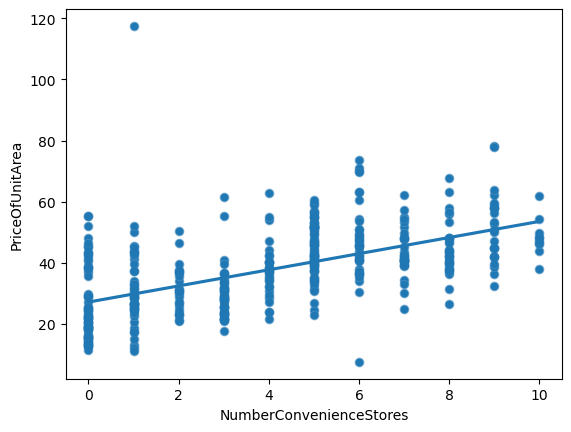

In [2]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(data=taiwan_real_estate, x="NumberConvenienceStores", y="PriceOfUnitArea")

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="NumberConvenienceStores",
         y="PriceOfUnitArea",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

In [6]:
# Import the ols function
from statsmodels.formula.api import ols #ordinary least square, which is similar to 

# Create the model object
mdl_price_vs_conv = ols("PriceOfUnitArea ~ NumberConvenienceStores", data=taiwan_real_estate) #helps in finding the intercept and slope

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept                  27.181105
NumberConvenienceStores     2.637653
dtype: float64


# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
            x="PriceOfUnitArea",
            col="HouseAge",
            bins=1000)

# Show the plot
plt.show()

In [8]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("PriceOfUnitArea ~ HouseAge", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

Intercept    42.434697
HouseAge     -0.251488
dtype: float64


In [9]:
# Import numpy with alias np
import numpy as np

# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Print it
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [13]:
# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame(taiwan_real_estate["NumberConvenienceStores"])

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Print it
print(price_twd_msq.head())

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq=price_twd_msq
)

# Print the result
print(prediction_data)

0    53.557639
1    50.919986
2    40.369372
3    40.369372
4    40.369372
dtype: float64
     NumberConvenienceStores  price_twd_msq
0                         10      53.557639
1                          9      50.919986
2                          5      40.369372
3                          5      40.369372
4                          5      40.369372
..                       ...            ...
409                        0      27.181105
410                        9      50.919986
411                        7      45.644679
412                        5      40.369372
413                        9      50.919986

[414 rows x 2 columns]


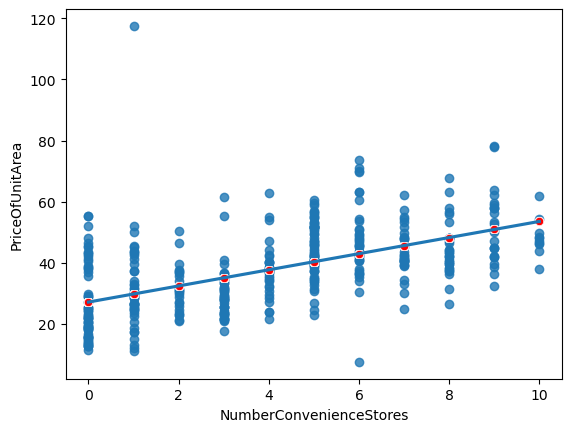

In [15]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="NumberConvenienceStores",
            y="PriceOfUnitArea",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="NumberConvenienceStores",
            y="price_twd_msq",
            data=prediction_data,
            color='r')

# Show the layered plot
plt.show()

In [17]:
# Example of creating a DataFrame with a single column
import pandas as pd

# Define a DataFrame with a column and a list of values
impossible = pd.DataFrame({"NumberConvenienceStores": [-1, 2.5]})
price_twd_msq_fake = mdl_price_vs_conv.predict(impossible)
print(price_twd_msq_fake)

0    24.543451
1    33.775238
dtype: float64


In [18]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)
# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)
# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

Intercept                  27.181105
NumberConvenienceStores     2.637653
dtype: float64
0      53.557639
1      50.919986
2      40.369372
3      40.369372
4      40.369372
         ...    
409    27.181105
410    50.919986
411    45.644679
412    40.369372
413    50.919986
Length: 414, dtype: float64
0     -15.657639
1      -8.719986
2       6.930628
3      14.430628
4       2.730628
         ...    
409   -11.781105
410    -0.919986
411    -5.044679
412    12.130628
413    12.980014
Length: 414, dtype: float64
                            OLS Regression Results                            
Dep. Variable:        PriceOfUnitArea   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           3.41e-37
Time:                        04:43:41   Log-Likelihood:                -1586.0
No. Obs

The "Need to Know" Metrics for an ML Engineer
When you train a linear regression model, you are essentially trying to create a formula. This summary tells you exactly what that formula is and how good it is.

1. The Formula of Your Model (The Coefficients Table)
This table gives you the precise equation your model is using to predict house prices.
| Term | coef (Coefficient) | P>|t| (P-value) |
| :--- | :--- | :--- |
| Intercept | 27.1811 | 0.000 |
| NumberConvenienceStores | 2.6377 | 0.000 |
How to use this:
Your model has determined that the relationship is:

PriceOfUnitArea=27.1811+(2.6377*NumberConvenienceStores) 

Interpretation for ML: For every additional convenience store nearby, your model predicts the price per unit area increases by approximately 2.64 units (e.g., thousands of currency).
P-values (P>|t|): These are extremely important. A value of 0.000 means that the relationship between convenience stores and price is almost certainly real and not due to random chance. In ML, we want p-values less than 0.05 to ensure our features are meaningful predictors.


2. How Good is the Model's Fit? (The Model Statistics Table)
This top section tells you how much of the variation in housing prices your single feature can explain.

Metric	Value
R-squared	0.326
Adj. R-squared	0.324
No. Observations	414


How to use this:
R-squared: This is your primary metric for goodness of fit. A value of 0.326 (or 32.6%) means that the NumberConvenienceStores feature alone explains about 32.6% of the variability in housing prices within your dataset.
ML Context: This tells you the feature is useful, but over two-thirds of the price variation is explained by other factors not included in this simple model (e.g., size, location, age). An ML engineer would recognize this R-squared value as "okay for a start," but would immediately look for more features to add to the model to improve performance.


3. Is the Model as a Whole Useful? (The F-statistic)
Metric	Value
F-statistic	199.3
Prob (F-statistic)	3.41e-37
How to use this:
The F-statistic and its P-value: This tests the overall significance of your entire model. A massive F-statistic and a tiny P-value (3.41e-37, which is a number with 36 zeros after the decimal point) confirm that your model is statistically significant.
ML Context: This assures you that you are not just fitting random noise; there is a real linear relationship in the data that your model has captured.


4. Diagnostics and Assumptions (The Bottom Section)
This section helps you ensure your model is valid and hasn't violated any fundamental assumptions of linear regression.
Durbin-Watson: (1.993) This checks for autocorrelation (if errors in one prediction are related to errors in the next). A value close to 2.0 (yours is 1.993) is excellent and means this assumption is met.
Prob(Omnibus) & Prob(JB) & Skew/Kurtosis: These metrics check if your model's residuals (the errors it makes) are normally distributed (a key assumption of OLS).
The values here (0.000 for the Probabilities) suggest that your errors are not perfectly normally distributed (the Skew and Kurtosis values are high).
ML Context: While your model works, this diagnostic alerts you that the predictions might be biased for extreme values (very high or very low prices), and you might need to explore data transformations or use a different type of model if prediction accuracy on outliers is critical.

In [19]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

     NumberConvenienceStores
0                  53.557639
1                  50.919986
2                  40.369372
3                  40.369372
4                  40.369372
..                       ...
409                27.181105
410                50.919986
411                45.644679
412                40.369372
413                50.919986

[414 rows x 1 columns]
     NumberConvenienceStores  predictions_auto
0                  53.557639         53.557639
1                  50.919986         50.919986
2                  40.369372         40.369372
3                  40.369372         40.369372
4                  40.369372         40.369372
..                       ...               ...
409                27.181105         27.181105
410                50.919986         50.919986
411                45.644679         45.644679
412                40.369372         40.369372
413                50.919986         50.919986

[414 rows x 2 columns]


C:\Users\vinay\AppData\Local\Temp\ipykernel_8064\2971113896.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coeffs[0]
C:\Users\vinay\AppData\Local\Temp\ipykernel_8064\2971113896.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = coeffs[1]


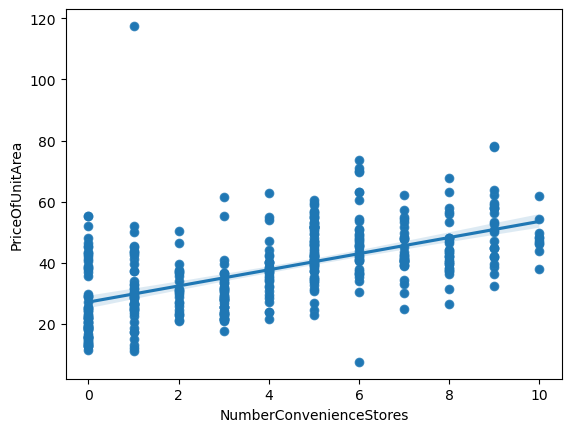

In [23]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
#plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.scatterplot(data=taiwan_real_estate, x="NumberConvenienceStores", y="PriceOfUnitArea")
sns.regplot(data=taiwan_real_estate, x="NumberConvenienceStores", y="PriceOfUnitArea")
# Set the axes so that the distances along the x and y axes look the same


# Show the plot
plt.show()



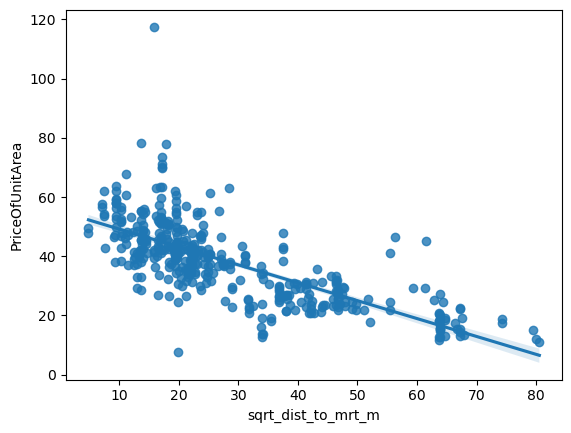

In [26]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["DistanceToMRT"])

plt.figure()

# Plot using the transformed variable
sns.regplot(data=taiwan_real_estate,x="sqrt_dist_to_mrt_m",y="PriceOfUnitArea")
plt.show()

In [32]:
from statsmodels.formula.api import ols #ordinary least square, which is similar to 

# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["DistanceToMRT"])

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("PriceOfUnitArea ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             55.225885
sqrt_dist_to_mrt_m    -0.604296
dtype: float64


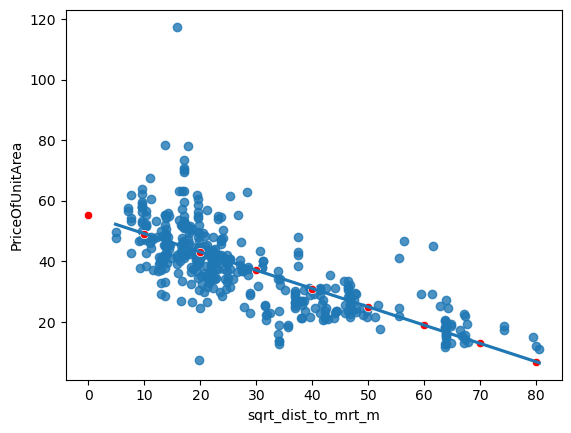

In [39]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["DistanceToMRT"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("PriceOfUnitArea ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "DistanceToMRT": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="PriceOfUnitArea", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x="sqrt_dist_to_mrt_m", y="price_twd_msq", color='r')
plt.show()

In [40]:
ad_conversion = pd.read_csv("KAG_conversion_data.csv")
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=ad_conversion).fit()

mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression_trans.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0      -0.392508
1           26.591479       500000.0       3.112689
2           31.622777      1000000.0       3.775897
3           34.996355      1500000.0       4.220591
4           37.606031      2000000.0       4.564589
5           39.763536      2500000.0       4.848984
6           41.617915      3000000.0       5.093422


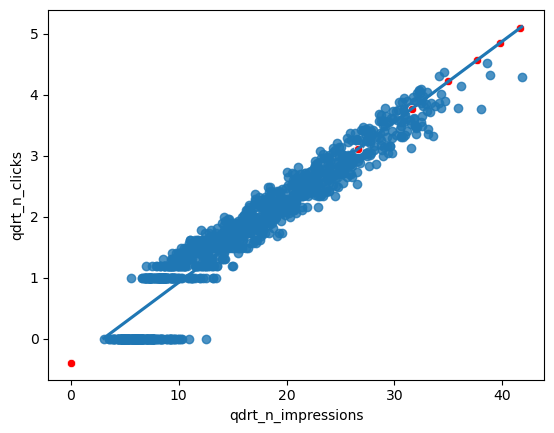

In [41]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x="qdrt_n_impressions", y="qdrt_n_clicks", color='r')
plt.show()

In [42]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  18.027709837733607
RSE of transformed model:  0.31881195369004856


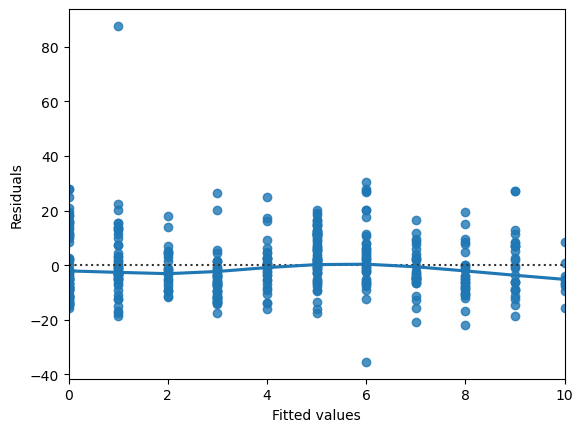

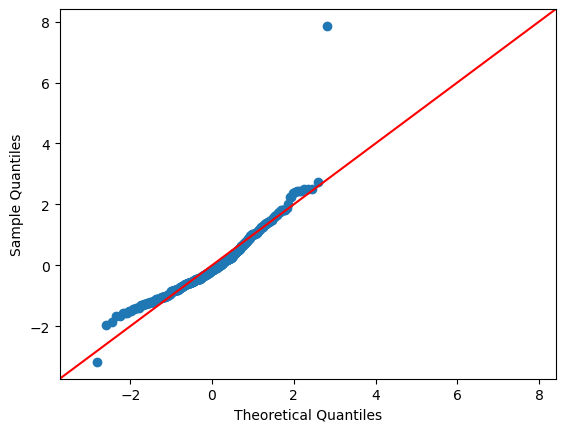

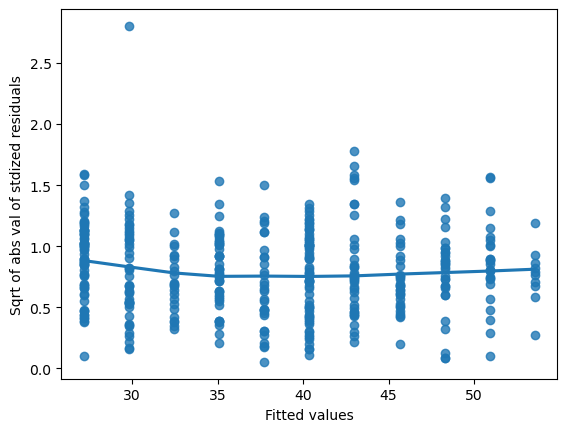

In [43]:
# Plot the residuals vs. fitted values
sns.residplot(x="NumberConvenienceStores", y="PriceOfUnitArea", data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

What is a Residplot? 

A residual plot is a scatterplot that places the residuals (the errors or "leftover" parts of the prediction: 

Actual Value - Predicted Value) on the vertical (y) axis and typically the predicted values (or the independent variable) on the horizontal (x) axis. 


How a Residplot Helps an ML Engineer The primary use of the residplot is to visually verify the core assumptions of Ordinary Least Squares (OLS) regression. 


1. Verifying Linearity (Is a straight line the right model?) What to look for: A purely random, unstructured cloud of points scattered around the horizontal line at \(y=0\).What it means: This randomness indicates that your linear model has captured all the systematic, explainable information in the data. The errors left over are just random noise ("statistically divine" randomness).If you see a pattern (e.g., a curve/U-shape): This is a huge red flag. It means your model is systematically wrong in certain areas (e.g., consistently over-predicting low values and under-predicting high values). This indicates that the true relationship is likely non-linear, and you should consider adding polynomial terms or using a different model.
  
2. Checking for Constant Variance (Homoscedasticity) What to look for: The vertical spread of the points should be roughly the same across the entire plot.If you see a "fan" or "cone" shape (Heteroscedasticity): This means your model's prediction errors get larger as the predicted value increases. The model is less reliable for higher values of your target variable. This can make your p-values and confidence intervals untrustworthy.

3. Identifying Outliers and Influential Data Points What to look for: Points that are very far vertically from the \(y=0\) line are potential outliers (large errors).ML Context: These points might be data entry errors or unique cases that disproportionately affect your model's fit. An ML engineer would investigate these specific data points to decide whether to clean them from the dataset or acknowledge that the model struggles with specific scenarios. Summary: The ML Engineer's Takeaway A residplot is your model's report card for its fundamental assumptions. Good Plot = Valid Model: If the plot looks like random noise around zero, you can trust your R-squared, coefficients, and p-values.Bad Plot = Room for Improvement: A pattern (curve, funnel, etc.) is not necessarily a failure; it's a guide that tells you exactly how to improve your model (e.g., add more variables, transform variables, use a non-linear model). 

A Q-Q plot (Quantile-Quantile plot) is a powerful graphical tool used to determine if a dataset follows a specific theoretical distribution (like the normal distribution) or if two different datasets come from the same distribution. 

For a machine learning engineer, it is essential for validating the assumptions that many statistical models, like linear regression, rely upon.

How a Q-Q Plot Works
The plot works by ordering all the data points in your sample and plotting their quantiles against the quantiles of a theoretical distribution (usually a standard normal distribution, or "bell curve"). 
A diagonal straight line is added as a reference.
If the points on your plot fall approximately along this straight line, it means your data's distribution closely matches the theoretical distribution.
If the points systematically deviate from the line, the distributions are different, revealing specific characteristics like skewness or outliers. 

How it Helps an ML Engineer (Diagnostic Use)
The primary reason an ML engineer uses a Q-Q plot is to verify model assumptions, most commonly that the residuals (errors) of a linear regression model are normally distributed. 
Violating this assumption can make your model's statistical inferences (like the p-values and confidence intervals you saw in the OLS summary) unreliable.

Here's what different patterns tell you:
Pattern on the Plot ->	Interpretation ->	ML Action
Points follow a straight line	-> Data (or residuals) are approximately normally distributed.	-> The model assumptions are met; proceed with confidence.
S-shaped curve	-> The data has "heavier tails" or "lighter tails" than a normal distribution (more or fewer extreme values/outliers).	-> Investigate and possibly handle outliers differently; consider models robust to non-normal tails.
Curved (concave or convex) line	-> The data is skewed (lopsided: left-skewed or right-skewed).	-> Apply data transformations (like a log or square root transform) to make the data more normal before modeling.

In essence, while numerical tests for normality exist, a Q-Q plot provides a powerful visual assessment that helps an engineer understand the nature of the problem, not just whether a problem exists. 

Scale-Location Plot, also known as a Spread-Location Plot. It is a vital diagnostic graph used specifically to check one of the most critical assumptions of linear regression: homoscedasticity (constant variance). 

What is a Scale-Location Plot?
This plot displays the following:
X-axis: The Fitted Values (the prices your model predicted for the houses).
Y-axis: The Square Root of the Absolute Standardized Residuals. Taking the square root helps spread out the data points, making patterns in the variance easier to see visually than in a standard residual plot. 
The lowess=True argument in your sns.regplot adds a locally weighted smooth line that helps highlight any trends in the spread of the residuals. 

How It Helps an ML Engineer
As an ML engineer, this plot tells you if your model is equally reliable across all its predicted price ranges. 
The Assumption: Standard linear regression assumes that the amount of error (variance) is constant, no matter whether you are predicting a cheap house or an expensive house. This is called homoscedasticity.
The Problem (Heteroscedasticity): If the variance changes depending on the price, your model's confidence intervals and statistical tests (like the P-values you saw earlier) become unreliable and biased. 
The Scale-Location plot provides the clearest visual test for this assumption.

What to Observe in the Plot
You are looking for two main things in a scale-location plot:
1. A Horizontal Red Line
Ideal Outcome (Good Model): The red smooth line should be roughly horizontal and relatively flat across the entire plot.
What it means: The average size of your prediction errors is consistent, regardless of the predicted value. The assumption of homoscedasticity is met.
Problem Outcome (Bad Model): The red line slopes upward or downward, perhaps forming a cone or "fan" shape in the scatter points.
What it means: You have heteroscedasticity. Your model's errors are increasing or decreasing systematically with the predicted price. For example, your price predictions for expensive houses might have a much wider margin of error than for cheap houses. 
2. Random Scatter of Points
Ideal Outcome: The points should be randomly scattered around the red horizontal line with a consistent vertical spread.
Problem Outcome: The points are bunched together in some areas and widely spread out in others (the "fan" shape mentioned above). 

In summary: If your plot shows a flat, horizontal line with a random cloud of points, your model is statistically sound in its variance assumption. If you see a pattern, you need to revisit your data (perhaps using a log transformation of the price variable) to stabilize the variance before trusting your model's statistical outputs. 

In [44]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values("cooks_dist", ascending=False).head())

      No  TransactionDate  HouseAge  DistanceToMRT  NumberConvenienceStores  \
270  271         2013.333      10.8       252.5822                        1   
148  149         2013.500      16.4      3780.5900                        0   
228  229         2013.417      11.9      3171.3290                        0   
220  221         2013.333      37.2       186.5101                        9   
113  114         2013.333      14.8       393.2606                        6   

     Latitude  Longitude  PriceOfUnitArea  sqrt_dist_to_mrt_m  leverage  \
270  24.97460  121.53046            117.5           15.892835  0.003849   
148  24.93293  121.51203             45.1           61.486503  0.012147   
228  25.00115  121.51776             46.6           56.314554  0.009332   
220  24.97703  121.54265             78.3           13.656870  0.004401   
113  24.96172  121.53812              7.6           19.830799  0.003095   

     cooks_dist  
270    0.115549  
148    0.052440  
228    0.035384  
22

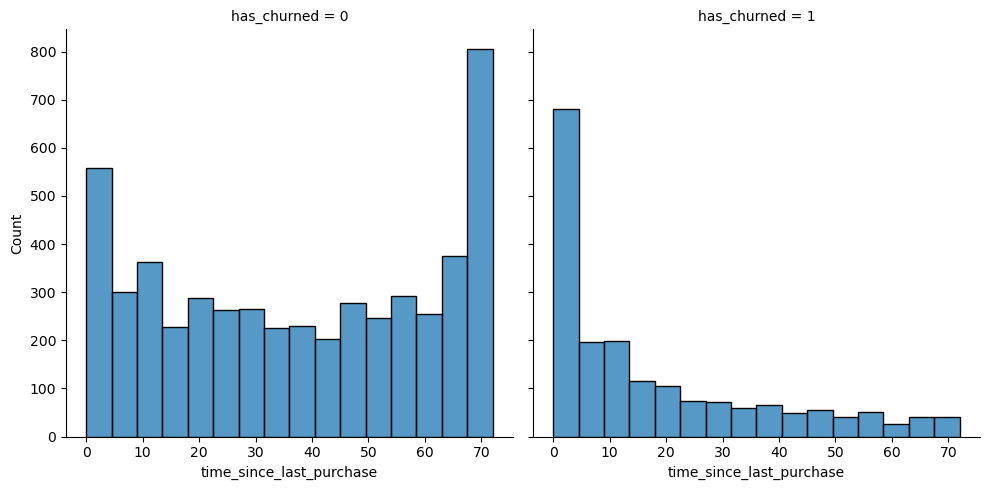

In [48]:
# Create the histograms of time_since_last_purchase split by has_churned
churn = pd.read_csv("Churn.csv")
sns.displot(data=churn, x="time_since_last_purchase", col="has_churned")

plt.show()

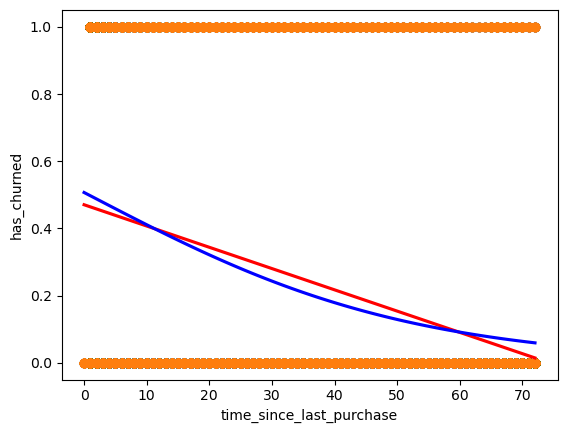

In [49]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True,
            line_kws={"color": "blue"})

plt.show()

In [50]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_last_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.510569
         Iterations 6
Intercept                   0.027313
time_since_last_purchase   -0.038767
dtype: float64


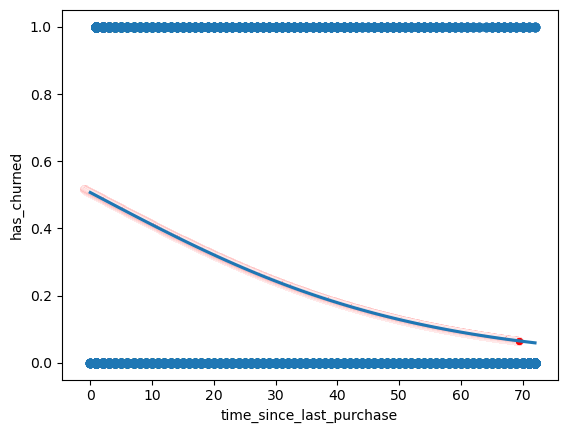

In [56]:
# Create prediction_data
stop = -1 + (0.01 * 7043)  # 69.43
explanatory_data = pd.DataFrame(
    {"time_since_last_purchase": np.arange(-1, stop, 0.01)}
)


prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(data=churn, x="time_since_last_purchase" , y= "has_churned", ci=None, logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(data=prediction_data, x="time_since_last_purchase" , y= "has_churned", color='r')

plt.show()

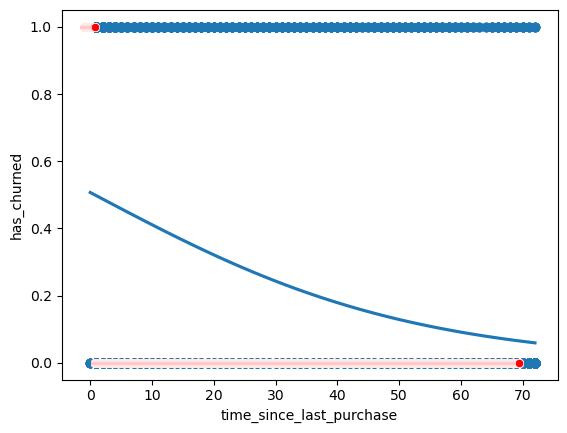

In [57]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(data=prediction_data, x="time_since_last_purchase", y="most_likely_outcome", color='r')

plt.show()

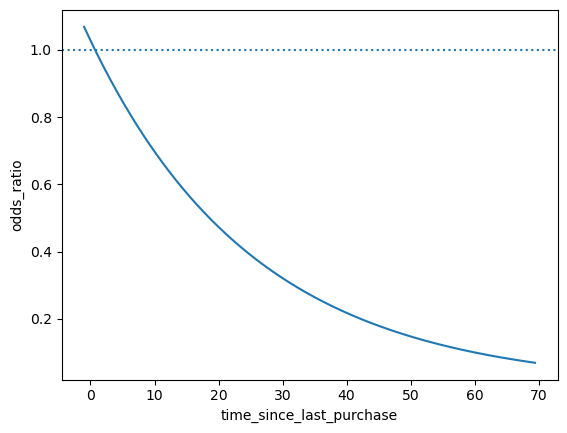

In [58]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(data=prediction_data,x= "time_since_last_purchase", y="odds_ratio")

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

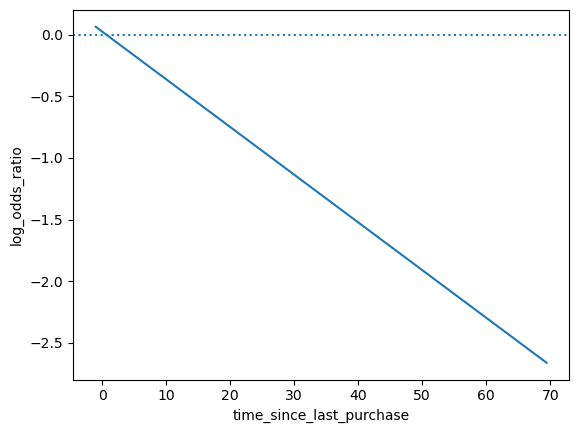

In [59]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_last_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

In [60]:
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict(churn["time_since_last_purchase"]))

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   5163
                 1.0                     11
1                0.0                   1869
Name: count, dtype: int64


[[5163.   11.]
 [1869.    0.]]


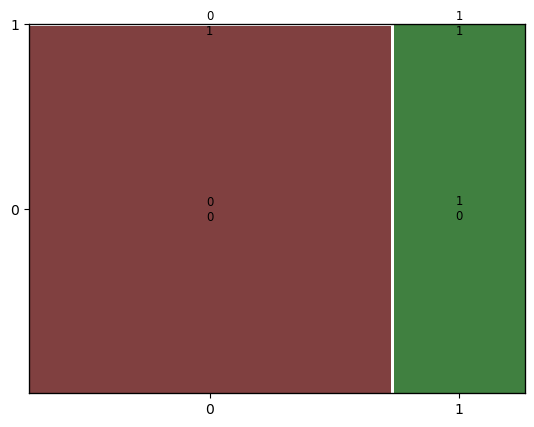

In [61]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

In [62]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN+TP)/(TN+TP+FN+FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP/(TP+FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN/(TN+FP)
print("specificity: ", specificity)

accuracy:  0.7330682947607554
sensitivity:  0.0
specificity:  0.9978739853111712
